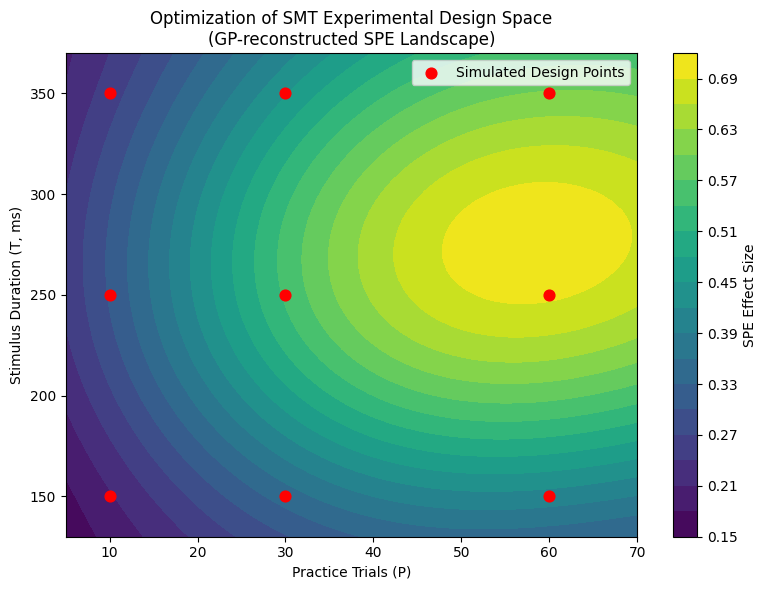

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# =========================
# 1. 构造“模拟得到的”实验设计数据
# =========================

# P: 练习次数, T: 刺激呈现时间(ms)
# SPE: 自我优势效应量（虚构，用于演示）
data = np.array([
    [10, 150, 0.20],
    [10, 250, 0.30],
    [10, 350, 0.25],
    [30, 150, 0.35],
    [30, 250, 0.55],
    [30, 350, 0.45],
    [60, 150, 0.40],
    [60, 250, 0.70],
    [60, 350, 0.60],
])

X = data[:, :2]   # P, T
y = data[:, 2]    # SPE

# =========================
# 2. 高斯过程回归模型
# =========================

kernel = C(1.0, (0.1, 10.0)) * RBF(length_scale=[20, 50], length_scale_bounds=(1, 200))
gpr = GaussianProcessRegressor(
    kernel=kernel,
    alpha=0.02,
    n_restarts_optimizer=10,
    normalize_y=True
)

gpr.fit(X, y)

# =========================
# 3. 构建实验设计空间网格
# =========================

P_range = np.linspace(5, 70, 50)
T_range = np.linspace(130, 370, 50)

P_grid, T_grid = np.meshgrid(P_range, T_range)
X_pred = np.column_stack([P_grid.ravel(), T_grid.ravel()])

# =========================
# 4. GP 预测 SPE
# =========================

SPE_pred, SPE_std = gpr.predict(X_pred, return_std=True)
SPE_pred = SPE_pred.reshape(P_grid.shape)
SPE_std = SPE_std.reshape(P_grid.shape)

# =========================
# 5. 可视化：实验设计空间中的 SPE
# =========================

plt.figure(figsize=(8, 6))

contour = plt.contourf(
    P_grid, T_grid, SPE_pred,
    levels=20, cmap='viridis'
)

plt.colorbar(contour, label='SPE Effect Size')

# 原始模拟点
plt.scatter(X[:, 0], X[:, 1], c='red', s=60, label='Simulated Design Points')

plt.xlabel('Practice Trials (P)')
plt.ylabel('Stimulus Duration (T, ms)')
plt.title('Optimization of SMT Experimental Design Space\n(GP-reconstructed SPE Landscape)')

plt.legend()
plt.tight_layout()
plt.show()
